In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

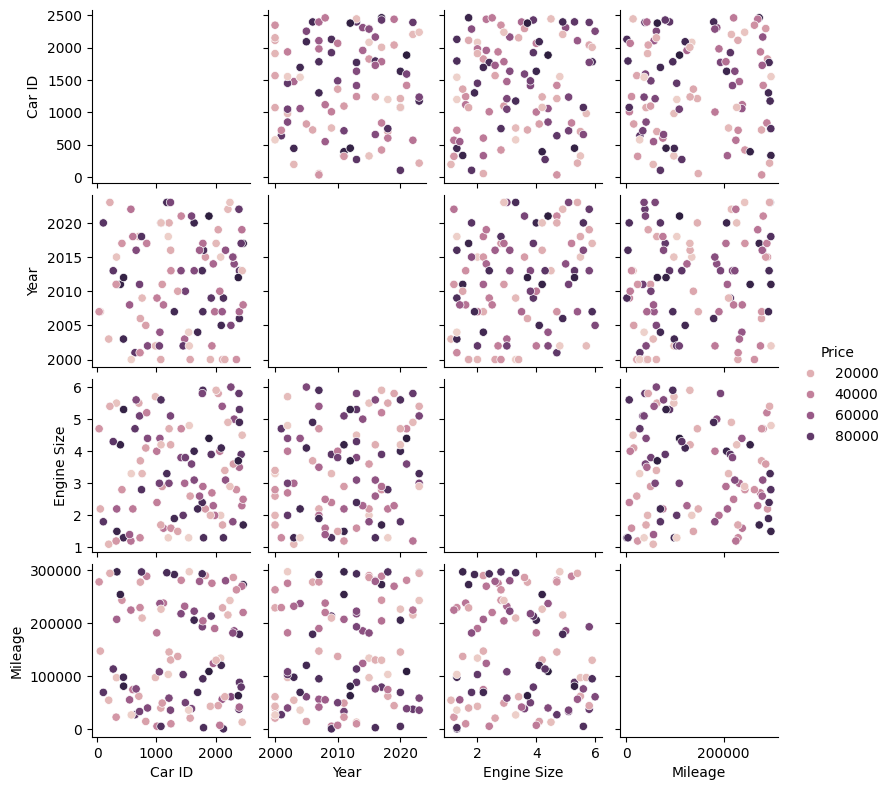

In [14]:
cardf = pd.read_csv('car_price_prediction.csv',sep=",")

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(cardf)), size=100, replace=False)
pairplot(cardf.iloc[indices], hue='Price', height=2)

In [15]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [16]:
X = cardf.drop(['Price','Car ID'],axis=1)

X = pd.get_dummies(X, columns=['Brand', 'Fuel Type','Transmission','Condition','Model'], drop_first=True,dtype=int).values

y = cardf['Price'].values

print(X[:,:3])

[[2.01600e+03 2.30000e+00 1.14832e+05]
 [2.01800e+03 4.40000e+00 1.43190e+05]
 [2.01300e+03 4.50000e+00 1.81601e+05]
 ...
 [2.02100e+03 1.10000e+00 2.72827e+05]
 [2.00200e+03 4.50000e+00 2.29164e+05]
 [2.00500e+03 4.60000e+00 8.09780e+04]]


In [17]:
y = y.reshape(-1,1)

print(y)

[[26613.92]
 [14679.61]
 [44402.61]
 ...
 [29902.45]
 [46085.67]
 [16594.14]]


In [18]:
X_norm = (X[:, :3] - X[:, :3].min(axis=0)) / (X[:, :3].max(axis=0) - X[:, :3].min(axis=0))

print(f"Here is X normalized part: \n{X_norm}")

X_cat = X[:,3:]

print(f"Here is X categorical part:\n{X_cat}")

X = np.hstack((X_norm,X_cat))

print(f"Here is X:\n{X}")

print(f"X Shape: {np.shape(X)}")

Here is X normalized part: 
[[0.69565217 0.26       0.38278458]
 [0.7826087  0.68       0.47732637]
 [0.56521739 0.7        0.60538353]
 ...
 [0.91304348 0.02       0.90951886]
 [0.08695652 0.7        0.76395223]
 [0.2173913  0.72       0.26991985]]
Here is X categorical part:
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
Here is X:
[[0.69565217 0.26       0.38278458 ... 0.         0.         0.        ]
 [0.7826087  0.68       0.47732637 ... 0.         0.         0.        ]
 [0.56521739 0.7        0.60538353 ... 0.         0.         0.        ]
 ...
 [0.91304348 0.02       0.90951886 ... 0.         0.         0.        ]
 [0.08695652 0.7        0.76395223 ... 0.         0.         0.        ]
 [0.2173913  0.72       0.26991985 ... 1.         0.         0.        ]]
X Shape: (2500, 42)


In [19]:
y = (y - y.min(axis=0)) / (y.max(axis=0) - y.min(axis=0))

print(y)

[[0.22746499]
 [0.10180273]
 [0.4147709 ]
 ...
 [0.26209155]
 [0.43249267]
 [0.12196177]]


In [20]:
from sklearn.model_selection import train_test_split

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)

print(f"Here is X training set:\n{X_trn}\n\nHere is X test set:\n{X_tst}")

Here is X training set:
[[0.2173913  0.48       0.24465915 ... 0.         0.         0.        ]
 [0.17391304 0.12       0.84086454 ... 0.         0.         0.        ]
 [0.08695652 0.96       0.2996046  ... 0.         0.         0.        ]
 ...
 [0.60869565 0.44       0.26877967 ... 1.         0.         0.        ]
 [0.47826087 0.76       0.02107337 ... 0.         0.         0.        ]
 [0.13043478 0.68       0.70719315 ... 0.         0.         0.        ]]

Here is X test set:
[[0.43478261 0.4        0.70627634 ... 0.         0.         0.        ]
 [0.86956522 0.68       0.06256334 ... 0.         0.         0.        ]
 [0.56521739 0.66       0.18513629 ... 1.         0.         0.        ]
 ...
 [0.43478261 0.56       0.67093735 ... 0.         0.         0.        ]
 [0.7826087  0.7        0.19491452 ... 0.         0.         0.        ]
 [0.39130435 0.48       0.84442177 ... 0.         0.         0.        ]]


In [21]:
print(f"Here is y training set:\n{y_trn}\n\nHere is y test set:\n{y_tst}")

Here is y training set:
[[0.97491264]
 [0.04423893]
 [0.89393872]
 ...
 [0.72645773]
 [0.09945939]
 [0.30926779]]

Here is y test set:
[[0.13144631]
 [0.74663246]
 [0.86829192]
 [0.08961979]
 [0.75874801]
 [0.36931381]
 [0.4441881 ]
 [0.5638299 ]
 [0.18972538]
 [0.28787417]
 [0.62498626]
 [0.80338296]
 [0.94693872]
 [0.45608895]
 [0.57190065]
 [0.85468592]
 [0.67384733]
 [0.20655583]
 [0.0170382 ]
 [0.21578325]
 [0.09950004]
 [0.47904968]
 [0.93430985]
 [0.70992548]
 [0.43125735]
 [0.37482505]
 [0.83353985]
 [0.79719888]
 [0.7265723 ]
 [0.85329076]
 [0.89368117]
 [0.02887072]
 [0.09893071]
 [0.78111318]
 [0.52299757]
 [0.47560232]
 [0.09957301]
 [0.4186148 ]
 [0.16000536]
 [0.53705255]
 [0.97911875]
 [0.35126583]
 [0.02541294]
 [0.79040272]
 [0.22273356]
 [0.12410631]
 [0.76165289]
 [0.4581024 ]
 [0.14152662]
 [0.80521993]
 [0.7007067 ]
 [0.01549352]
 [0.98654215]
 [0.89248923]
 [0.89827013]
 [0.2263935 ]
 [0.20653288]
 [0.5818425 ]
 [0.81442176]
 [0.23071944]
 [0.83508769]
 [0.5559202

In [28]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

mod = model.fit(X_trn, y_trn, epochs=200,
          batch_size=2000,
          validation_data=(X_tst, y_tst))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1711 - mae: 0.3356 - val_loss: 0.1624 - val_mae: 0.3306
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1499 - mae: 0.3152 - val_loss: 0.1503 - val_mae: 0.3231
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.1366 - mae: 0.3022 - val_loss: 0.1442 - val_mae: 0.3190
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1300 - mae: 0.2962 - val_loss: 0.1418 - val_mae: 0.3164
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1274 - mae: 0.2942 - val_loss: 0.1402 - val_mae: 0.3141
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1262 - mae: 0.2933 - val_loss: 0.1378 - val_mae: 0.3108
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1245 - mae: 0.2917 - val_loss: 0.1344 - val_mae: 0.3064
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1218 - mae: 0.2889 - val_loss: 0.1301 - val_mae: 0.3016
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1183 - mae: 0

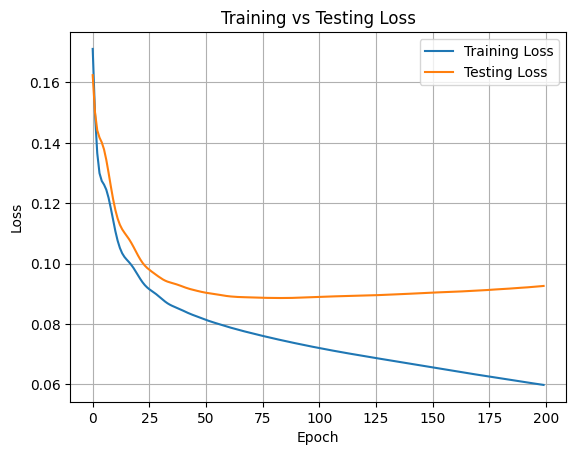

In [30]:
history = mod.history

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

mod = model.fit(X_trn, y_trn, epochs=200,
          batch_size=2000,
          validation_data=(X_tst, y_tst))

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - loss: 0.8912 - mae: 0.8783 - val_loss: 0.8961 - val_mae: 0.8800
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.8682 - mae: 0.8653 - val_loss: 0.8737 - val_mae: 0.8673
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.8460 - mae: 0.8525 - val_loss: 0.8520 - val_mae: 0.8548
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.8245 - mae: 0.8399 - val_loss: 0.8310 - val_mae: 0.8426
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.8037 - mae: 0.8276 - val_loss: 0.8107 - val_mae: 0.8307
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.7836 - mae: 0.8155 - val_loss: 0.7910 - val_mae: 0.8189
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.7641 - mae: 0.8036 - val_loss: 0.7720 - val_mae: 0.8073
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.7453 - mae: 0.7920 - val_loss: 0.7536 - val_mae: 0.7960
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.7271 - mae: 0.7806 

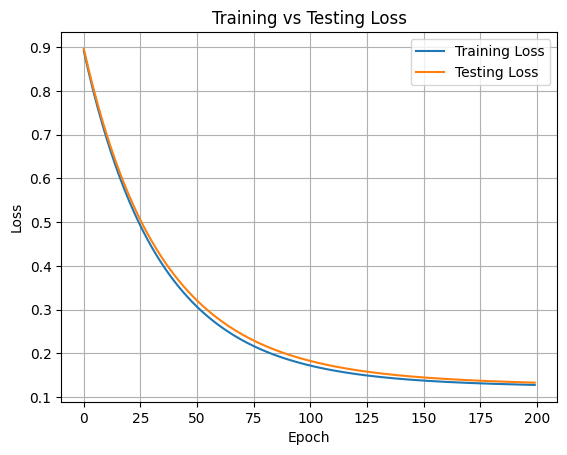

In [35]:
history = mod.history

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adagrad(),
    loss='mse',
    metrics=['mae']
)

mod = model.fit(X_trn, y_trn, epochs=200,
          batch_size=2000,
          validation_data=(X_tst, y_tst))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2838 - mae: 0.4462 - val_loss: 0.2843 - val_mae: 0.4484
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.2781 - mae: 0.4408 - val_loss: 0.2793 - val_mae: 0.4436
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.2730 - mae: 0.4360 - val_loss: 0.2746 - val_mae: 0.4393
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.2683 - mae: 0.4315 - val_loss: 0.2703 - val_mae: 0.4352
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2639 - mae: 0.4273 - val_loss: 0.2663 - val_mae: 0.4313
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2598 - mae: 0.4233 - val_loss: 0.2624 - val_mae: 0.4277
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2559 - mae: 0.4195 - val_loss: 0.2588 - val_mae: 0.4243
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.2521 - mae: 0.4159 - val_loss: 0.2553 - val_mae: 0.4210
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.2486 - mae: 0

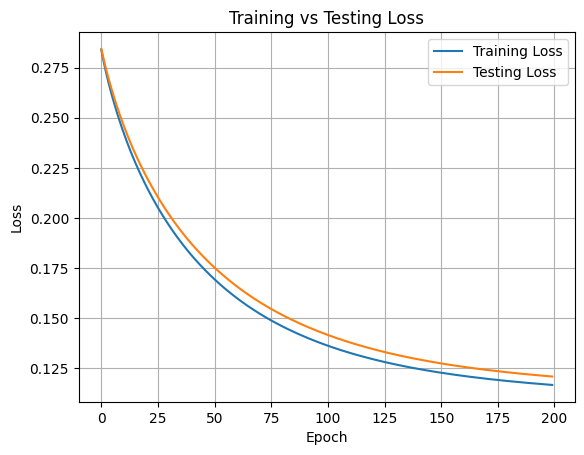

In [37]:
history = mod.history

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()